<a href="https://colab.research.google.com/github/shalinikarthick/shalinikarthick/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MULTIPLE LINEAR REGRESSION**

In [1]:
#import library for linear regression
import pandas as pd

**1st Jar of ML**

**DATA** 

In [2]:
dataset = pd.read_csv('petrol_consumption.csv') # to read the dataset
dataset
# dataset has 4 features and one 1 target variable

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


**I CLEANING:**

    1. Missing data
      a. impute (replace values with mean, median, mode)
      b. deletion

In [3]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

**2. Duplicates (delete data)**

In [4]:
dataset = dataset.drop_duplicates()
dataset.shape

(48, 5)

**3. Outliers**

In [5]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


To find outliers for all 4 feature columns

In [6]:
dict = {'Population_Driver_licence(%)': 'Population_Driver_licence'
        }
 
# call rename () method
dataset.rename(columns=dict,
          inplace=True)

In [7]:
iqr = dataset.Population_Driver_licence.quantile(0.75) - dataset.Population_Driver_licence.quantile(0.25)
upper_threshold = dataset.Population_Driver_licence.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Population_Driver_licence.quantile(0.25) - (1.5 * iqr)
lower_threshold

0.4315000000000002

In [8]:
iqr = dataset.Average_income.quantile(0.75) - dataset.Average_income.quantile(0.25)
upper_threshold = dataset.Average_income.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Average_income.quantile(0.25) - (1.5 * iqr)
lower_threshold

2479.375

In [9]:
iqr = dataset.Petrol_tax.quantile(0.75) - dataset.Petrol_tax.quantile(0.25)
upper_threshold = dataset.Petrol_tax.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Petrol_tax.quantile(0.25) - (1.5 * iqr)
lower_threshold

5.3125

In [10]:
iqr = dataset.Paved_Highways.quantile(0.75) - dataset.Paved_Highways.quantile(0.25)
upper_threshold = dataset.Paved_Highways.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Paved_Highways.quantile(0.25) - (1.5 * iqr)
lower_threshold

-2958.375

In [11]:
dataset.shape

(48, 5)

No skew in data

**5. Covert dtypes if it is not correct format**

In [ ]:
dataset.dtypes

Petrol_tax                   float64
Average_income                 int64
Paved_Highways                 int64
Population_Driver_licence    float64
Petrol_Consumption             int64
dtype: object

**EDA (Exploratory Data Analysis)**

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean()

Petrol_tax
5.00     640.000000
6.00     782.000000
6.58     644.000000
7.00     631.736842
7.50     536.000000
8.00     502.000000
8.50     582.666667
9.00     530.875000
10.00    457.000000
Name: Petrol_Consumption, dtype: float64

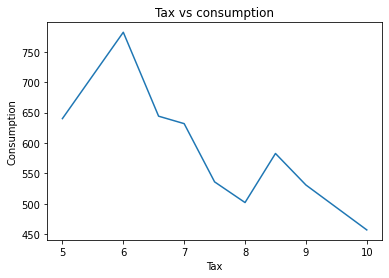

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [12]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000



1) There is a linear relationship between tax and consumption 

2) As tax increases, comsumption decreases which is in-line with our GK 

3) No transformation required


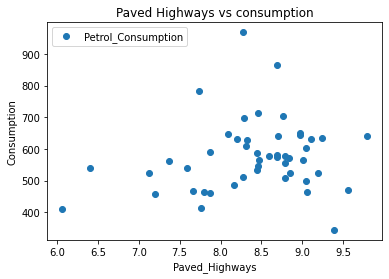

,transformed,Petrol_Consumption
transformed,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


In [14]:
import numpy as np
dataset['transformed'] = np.log(dataset['Paved_Highways'])
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()


1) There is no linear relationship between highways and consumption 

2) Have tried all trasnformations - still not able to see a good linear relationship 

3) Have decided to drop the feature

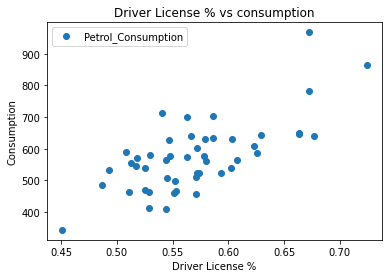

,Population_Driver_licence,Petrol_Consumption
Population_Driver_licence,1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [16]:
dataset.plot(x='Population_Driver_licence', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence','Petrol_Consumption']].corr()

1) High correlation between the data

2) No transformation reqd

**ENCODING**

Here encoding is not needed, since the data is already numerical 

**3.SPLIT**

To split the data using sklearn model

train data (70 - 80)%

test data (20 - 30)%

In [20]:
X = dataset[['Petrol_tax', 'Average_income', 'Population_Driver_licence']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


**4. NORMALISING/SCALING DATA**

Scaling is not mandatory for linear regression 

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**2nd Jar of ML**

**II TASK**

It is a** SUPERVISED** learning problem In general, prediction is to be done based on the target variable

**3rd Jar of ML**

**III MODEL**

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# petrol_consumption = -29.56 *scaled_petrol_tax + -38.03 * scaled_avg_income +  80.69 * scaled_pop_driver + 583

,Coefficient
Petrol_tax,-29.564915
Average_income,-38.034850
Population_Driver_licence(%),80.695238


In [23]:
regressor.intercept_ # c 

583.9736842105262

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,534,475.009063
1,410,520.746645
2,577,593.837289
3,571,566.627853
4,577,664.027455
5,704,645.700518
6,487,500.905660
7,587,663.819704
8,467,482.121399
9,580,501.285450


**4th Jar of ML**

**IV. LOSS FUNCTION**

** Parameters can take "infinite" values (smart way to find parameter is Gradient Descent)
* Loss function is a formula to find, how far my predictions are from "true target value"

**5th Jar of ML**

**V LEARNING JAR**

1. Hit & Trial (Time consuming)
2. Gradient Descent 
    1. convex (function with "one" local minima), (GD work always)
    2. non - convex (function with "multiple" local minima), (GD may or may not work)

**6th Jar of ML**

**VI. EVALUATION METRIC **

* Formula used to find which model is "supervision model"
*** R2 score

In [25]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.32520447692222665


Since R2 score is 0.32, model is not a best model. I have concluded after applying ML over here.